In [3]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('data/Train.csv')


In [231]:
df.head(3)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0


In [246]:
newdf.shape

(2399, 23)

In [250]:
newdf.shape

(2399, 23)

In [280]:
newdf.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,2398.000000,2398.000000,2398.000000,2398.000000,2.398000e+03
mean,1.243119,1.130525,8.414929,3.311927,1.225570e+07
std,1.172495,1.023329,8.960539,4.281046,1.439470e+07
min,0.000000,0.000000,0.000000,0.000000,4.972500e+04
25%,1.000000,1.000000,3.000000,0.000000,2.723196e+06
50%,1.000000,1.000000,7.000000,2.000000,7.380848e+06
75%,1.000000,1.000000,12.000000,6.000000,1.657500e+07
max,15.000000,15.000000,130.000000,60.000000,9.953288e+07


In [286]:
df_country = df.groupby(['country'])['total_cost'].sum().rename("total_cost_by_country")
df_country= df_country.to_frame().reset_index()
df_country['country'].replace(['UNITED STATES OF AMERICA'], 'USA')
df_country.head(10)


,country,total_cost_by_country
0,ALGERIA,4.563098e+06
1,ANGOLA,5.000000e+05
2,ARGENTINA,1.044225e+07
3,AUSTRALIA,2.474086e+09
4,AUSTRIA,1.324331e+08
5,BELGIUM,3.595478e+08
6,BRAZIL,6.760203e+07
7,BURGARIA,9.584475e+05
8,BURUNDI,9.855330e+06
9,CANADA,1.208025e+09


In [287]:
#top 12 countires we get for our new_cleaned data. 

df_country_sort= df_country.sort_values(['total_cost_by_country'],ascending=False).head(15)
df_country_sort

,country,total_cost_by_country
93,UNITED STATES OF AMERICA,7.527403e+09
38,ITALY,3.384829e+09
92,UNITED KINGDOM,3.326265e+09
27,FRANCE,3.123268e+09
3,AUSTRALIA,2.474086e+09
76,SOUTH AFRICA,2.223617e+09
29,GERMANY,2.049539e+09
77,SPAIN,1.393438e+09
9,CANADA,1.208025e+09
58,NETHERLANDS,1.156559e+09


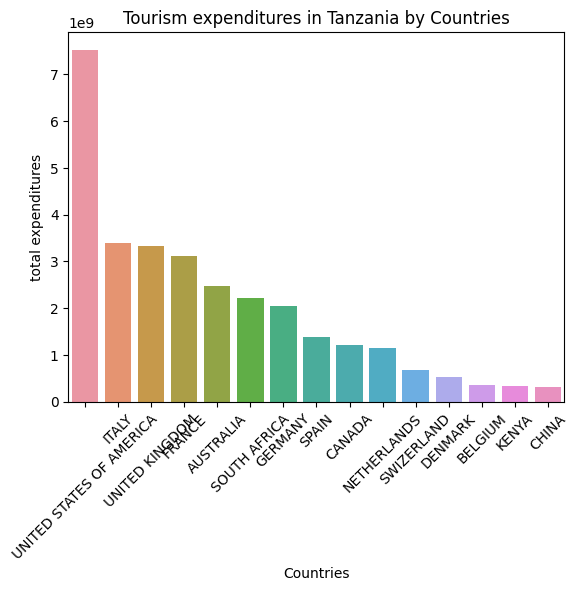

In [288]:
sns.barplot(x='country', y='total_cost_by_country', data=df_country_sort)

plt.xticks(rotation=45)
plt.ylabel("total expenditures")
plt.xlabel("Countries")
plt.title("Tourism expenditures in Tanzania by Countries")
plt.show()

In [289]:
#we analzye here people with package tour spend more money then people who go independetly

df_country_arrangment = df.groupby(['tour_arrangement'])['total_cost'].sum().rename("total_cost_by_country")
df_country_arrangment= df_country_arrangment.to_frame().reset_index()

df_country_arrangment.head(10)


,tour_arrangement,total_cost_by_country
0,Independent,5.366779e+09
1,Package Tour,2.830713e+10


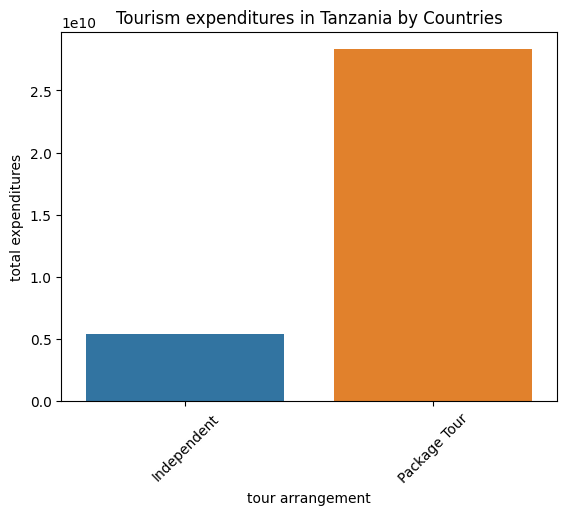

In [291]:
sns.barplot(x='tour_arrangement', y='total_cost_by_country', data=df_country_arrangment)

plt.xticks(rotation=45)
plt.ylabel("total expenditures")
plt.xlabel("tour arrangement")
plt.title("Tourism expenditures in Tanzania by Countries")
plt.show()

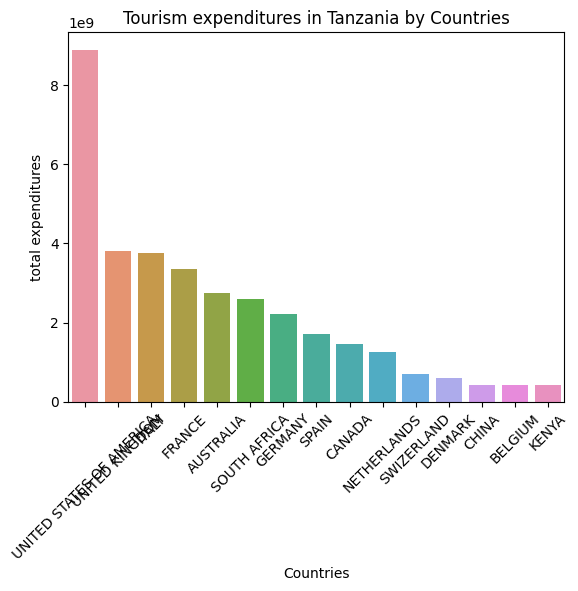

In [64]:
package_insurance

In [45]:
df_country = df.groupby(['travel_with'])['total_cost'].sum().rename("travel_cost_by_travel_with")
df_country= df_country.to_frame().reset_index()

df_country.head(10)

,travel_with,travel_cost_by_travel_with
0,Alone,4.334079e+09
1,Children,1.653502e+09
2,Friends/Relatives,9.158700e+09
3,Spouse,1.274631e+10
4,Spouse and Children,6.745753e+09


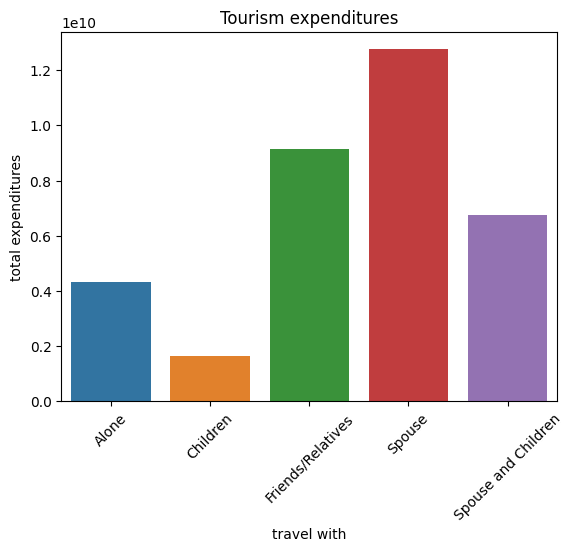

In [47]:
sns.barplot(x='travel_with', y='travel_cost_by_travel_with', data=df_country)

plt.xticks(rotation=45)
plt.ylabel("total expenditures")
plt.xlabel("travel with")
plt.title("Tourism expenditures")
plt.show()

In [293]:
df_package_insurance= df.groupby(['package_insurance'])['total_cost'].sum().rename("total_cost_by_insurance")
df_package_insurance= df_package_insurance.to_frame().reset_index()

df_package_insurance

,package_insurance,total_cost_by_insurance
0,No,2.310213e+10
1,Yes,1.057177e+10


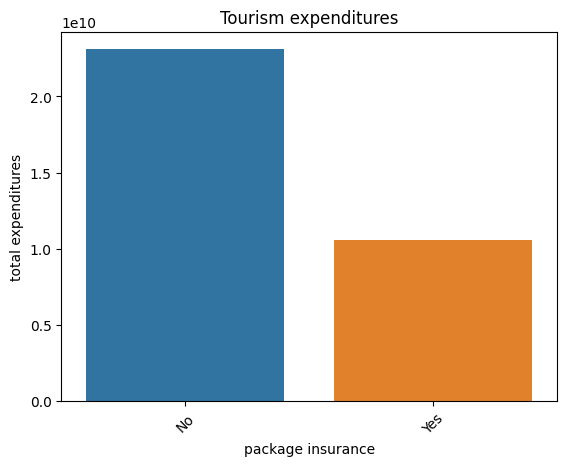

In [294]:
sns.barplot(x='package_insurance', y='total_cost_by_insurance', data=df_package_insurance)

plt.xticks(rotation=45)
plt.ylabel("total expenditures")
plt.xlabel("package insurance")
plt.title("Tourism expenditures")
plt.show()

In [297]:
df_package_trans= df.groupby(['package_transport_tz'])['total_cost'].sum().rename("total_cost_by_trans")
df_package_trans= df_package_trans.to_frame().reset_index()

df_package_trans

,package_transport_tz,total_cost_by_trans
0,No,8.918528e+09
1,Yes,2.475538e+10


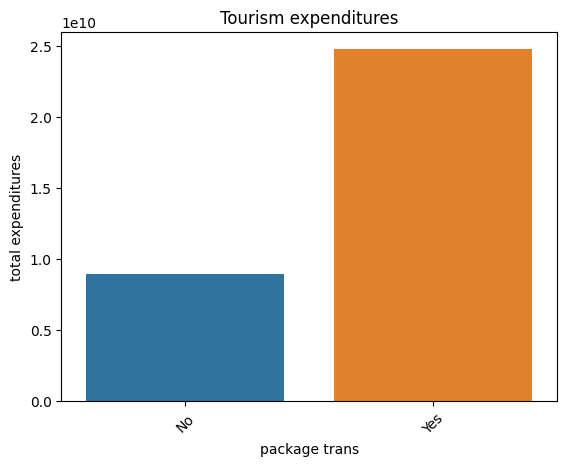

In [299]:
sns.barplot(x='package_transport_tz', y='total_cost_by_trans', data=df_package_trans)

plt.xticks(rotation=45)
plt.ylabel("total expenditures")
plt.xlabel("package trans")
plt.title("Tourism expenditures")
plt.show()

In [301]:
df_package_sightseeing= df.groupby(['package_sightseeing'])['total_cost'].sum().rename("total_cost_by_sightseeing")
df_package_sightseeing= df_package_sightseeing.to_frame().reset_index()

df_package_sightseeing

,package_sightseeing,total_cost_by_sightseeing
0,No,1.345138e+10
1,Yes,2.022253e+10


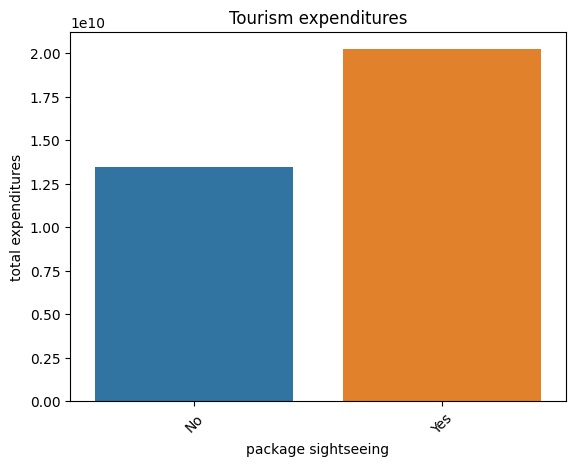

In [302]:
sns.barplot(x='package_sightseeing', y='total_cost_by_sightseeing', data=df_package_sightseeing)

plt.xticks(rotation=45)
plt.ylabel("total expenditures")
plt.xlabel("package sightseeing")
plt.title("Tourism expenditures")
plt.show()

In [303]:
df_package_guided= df.groupby(['package_guided_tour'])['total_cost'].sum().rename("total_cost_by_guided")
df_package_guided= df_package_guided.to_frame().reset_index()

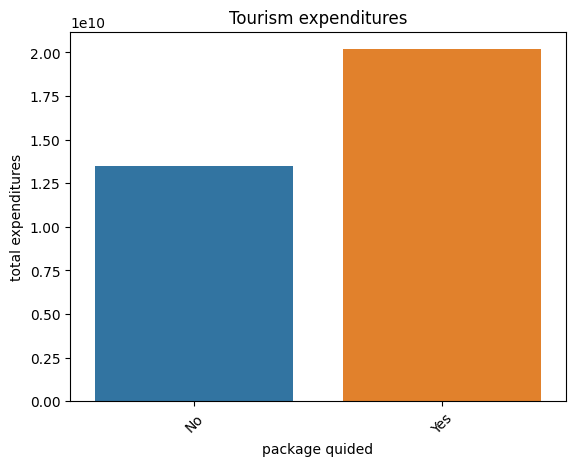

In [304]:
sns.barplot(x='package_guided_tour', y='total_cost_by_guided', data=df_package_guided)

plt.xticks(rotation=45)
plt.ylabel("total expenditures")
plt.xlabel("package quided")
plt.title("Tourism expenditures")
plt.show()

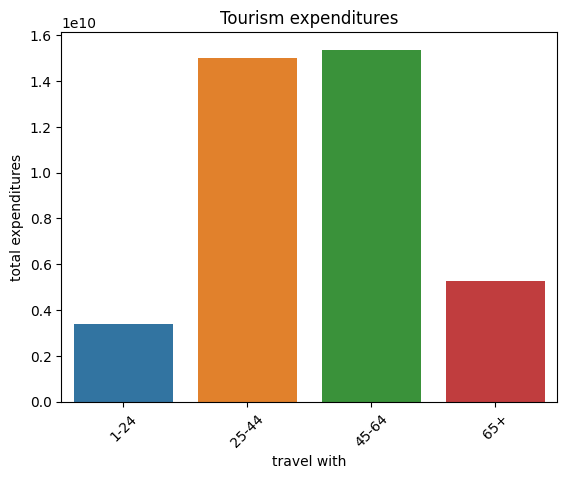

In [187]:
sns.barplot(x='age_group', y='total_cost_by_age', data=df_age)

plt.xticks(rotation=45)
plt.ylabel("total expenditures")
plt.xlabel("travel with")
plt.title("Tourism expenditures")
plt.show()

In [306]:
df_package_by_age= df.groupby(['age_group'])['package_insurance'].count().rename("count of insurance")
df_package_by_age= df_package_by_age.to_frame().reset_index()
df_package_by_age

,age_group,count of insurance
0,1-24,413
1,25-44,1729
2,45-64,1059
3,65+,259


In [307]:
#people who travel alone very like to buy insurance

df_package_by_travel_with= df.groupby(['travel_with'])['package_insurance'].count().rename("count of insurance")
df_package_by_travel_with= df_package_by_travel_with.to_frame().reset_index()
df_package_by_travel_with

,travel_with,count of insurance
0,Alone,1139
1,Children,152
2,Friends/Relatives,844
3,Spouse,968
4,Spouse and Children,357


In [5]:
df_package_by_most_impressing= df.groupby(['most_impressing','first_trip_tz'])['first_trip_tz'].count().rename("count of trip tz")
df_package_by_most_impressing= df_package_by_most_impressing.to_frame().reset_index()
df_package_by_most_impressing

,most_impressing,first_trip_tz,count of trip tz
0,Wildlife,No,206
1,Wildlife,Yes,832
2,Excellent Experience,No,87
3,Excellent Experience,Yes,184
4,Friendly People,No,554
5,Friendly People,Yes,987
6,Good service,No,109
7,Good service,Yes,256
8,No comments,No,314
9,No comments,Yes,429


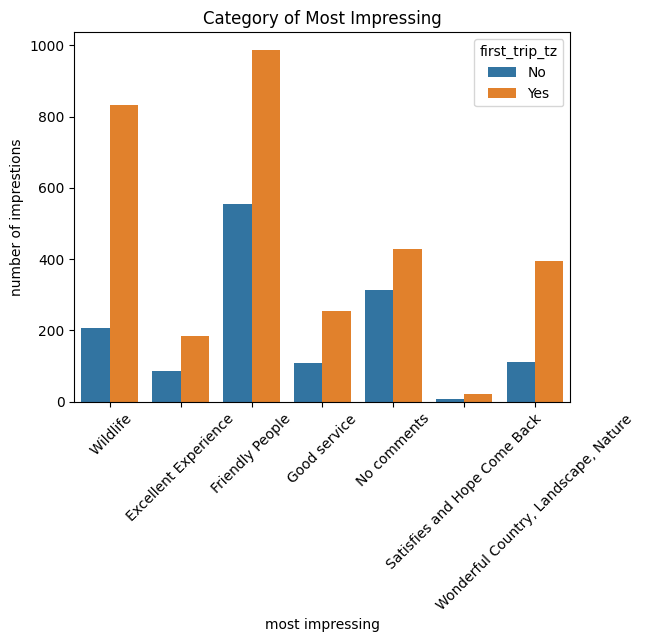

In [7]:
#people who left feed back as "Friendly people" are highly like to come back to Tanzania


sns.barplot(x='most_impressing', y='count of trip tz', data=df_package_by_most_impressing,hue = 'first_trip_tz')

plt.xticks(rotation=45)
plt.ylabel("number of imprestions")
plt.xlabel("most impressing")
plt.title("Category of Most Impressing")
plt.show()

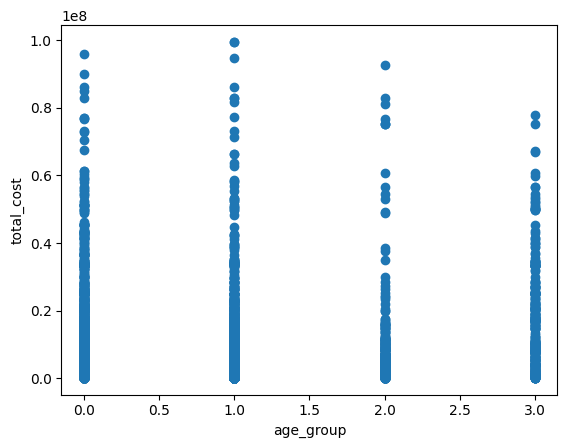

In [137]:
plt.scatter(df.age_group, df.total_cost)
plt.ylabel('total_cost')
plt.xlabel('age_group');

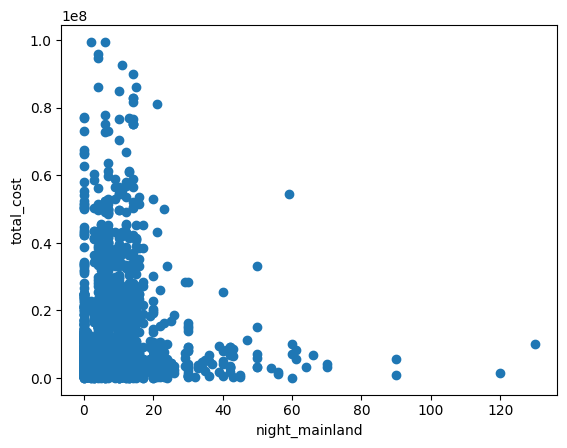

In [254]:
#we have outliers that isw we created a new data set to remove the outliers. 

plt.scatter(newdf['night_mainland'], newdf['total_cost'])
plt.xlabel("night_mainland")
plt.ylabel("total_cost");

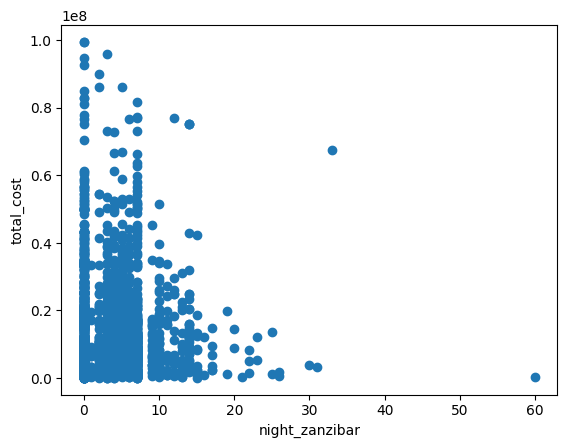

In [255]:
#we have outliers that isw we created a new data set to remove the outliers.

plt.scatter(newdf['night_zanzibar'], newdf['total_cost'])
plt.xlabel("night_zanzibar")
plt.ylabel("total_cost");

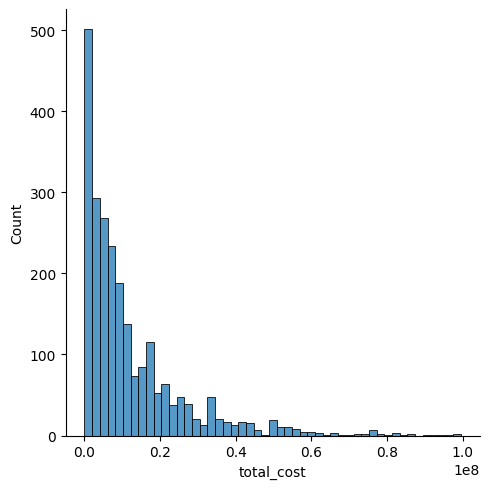

In [260]:
#we have outliers that isw we created a new data set to remove the outliers.
sns.displot(newdf, x="total_cost")

In [13]:
# we cleaned the data in the part of data cleaning.we created a separate csv file. Lets fist load the new csv file.

new_cleaned2 =pd.read_csv('new_cleaned.csv')

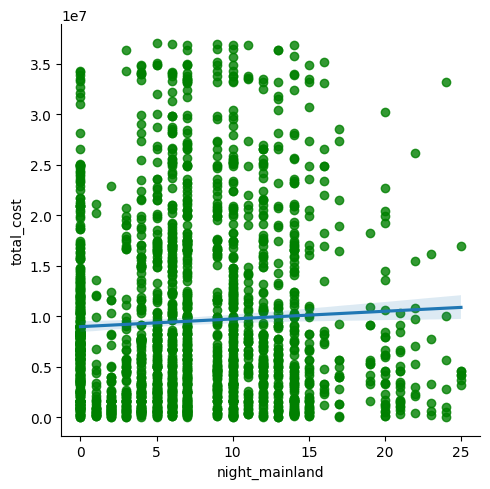

In [309]:
#now we have much better disrubited graphs.

sns.lmplot(x ='night_mainland', y ='total_cost', data = new_cleaned2,scatter_kws ={'color':'green'})

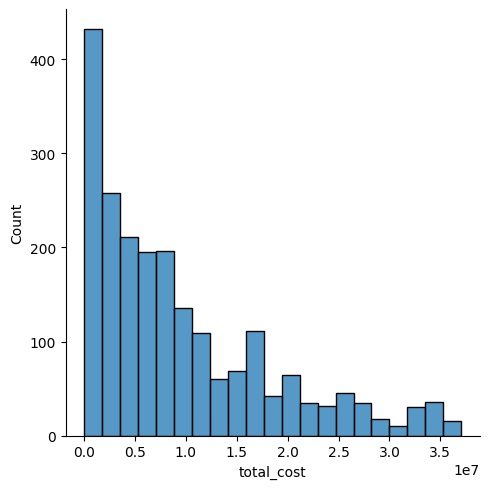

In [310]:

sns.displot(new_cleaned2, x="total_cost")

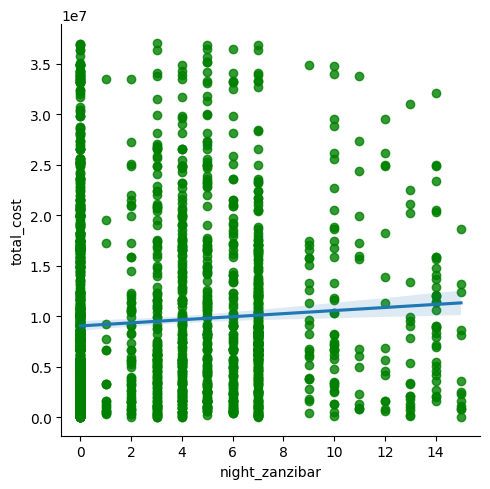

In [311]:
sns.lmplot(x ='night_zanzibar', y ='total_cost', data = new_cleaned2,scatter_kws ={'color':'green'})

In [14]:
new_cleaned2.eval('total_cost_euro = total_cost* 0.00044', inplace = True)
new_cleaned2.head(5)

,country,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,...,Independent,Package Tour,Wildlife,Excellent Experience,Friendly People,Good service,No comments,Satisfies and Hope Come Back,"Wonderful Country, Landscape, Nature",total_cost_euro
0,1,0,0,0,0,0,0,0,13.0,0.0,...,1,0,0,0,1,0,0,0,0,296.8251
1,2,0,1,1,1,1,1,0,11.0,0.0,...,0,1,0,0,1,0,0,0,0,3427.7100
2,9,0,0,0,0,0,0,0,9.0,0.0,...,1,0,0,0,1,0,0,0,0,205.1016
3,5,1,1,1,1,1,1,1,10.0,3.0,...,0,1,0,0,1,0,0,0,0,1531.5300
4,12,0,0,0,0,0,0,0,11.0,3.0,...,1,0,0,0,0,0,1,0,0,145.8600


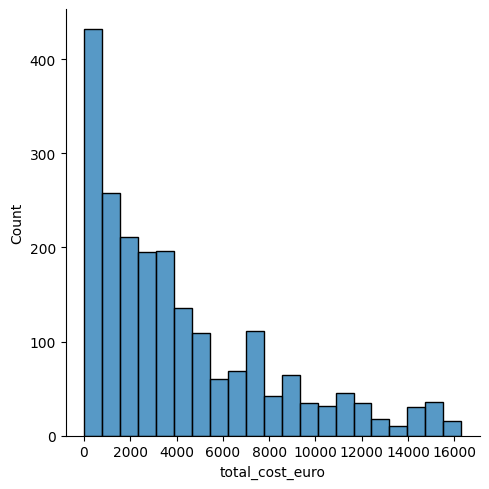

In [11]:
sns.displot(new_cleaned2, x="total_cost_euro")

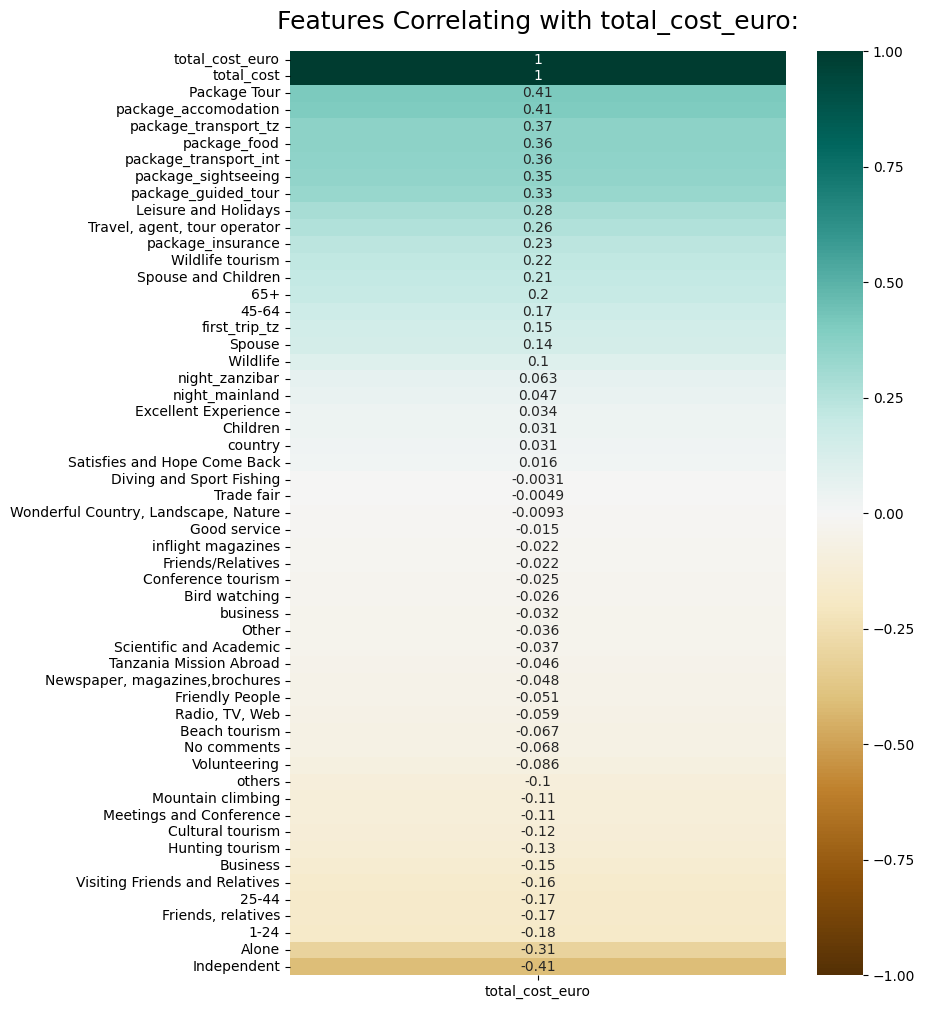

In [23]:
new_cleaned2.corr()[['total_cost_euro']].sort_values(by='total_cost_euro',ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(new_cleaned2.corr()[['total_cost_euro']].sort_values(by='total_cost_euro', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with total_cost_euro:', fontdict={'fontsize':18}, pad=16);